# Trabalho Final do Curso de Inteligência de Negócio da ICA PUC-Rio

PT_br: Este notebook vem apresentar a exploração de dados e uma proposta de predição do evaluation de empresas listadas na B3 em seu papel.

Eng: This notebook...

In [1]:
# Importing Libs

import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

Conexão ao Banco de Dados

In [2]:
# MySQL Database configuration
db_host = '192.168.0.121'
db_user = 'root'
db_password = 'root'
db_name = 'casa'

# URL de conexão ao database
db_url = f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}'

# Creating engine
engine = sqlalchemy.create_engine(db_url)

In [3]:
# Creating Dataframe

b3_data_df = pd.read_sql("Select * from b3", engine)

In [4]:
b3_data_df.head()

,Papel,Cotação,Tipo,Data últ cot,Empresa,Min 52 sem,Setor,Max 52 sem,Subsetor,Vol $ méd (2m),...,Cart. de Crédito,2017,2016,2015,2014,2013,2012,2011,2010,2024
0,AALR3,12.17,ON NM,2023-08-18,ALLIAR ON NM,12.17,Serv.Méd.Hospit. Análises e Diagnósticos,24.30,Serv.Méd.Hospit. Análises e Diagnósticos,9578510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,ABCB4,18.27,PN N2,2023-08-18,ABC Brasil PN N2,15.28,Intermediários Financeiros,21.26,Bancos,16134400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,ABEV3,14.36,ON,2023-08-18,AMBEV S/A ON,12.86,Bebidas,16.03,Cervejas e Refrigerantes,334377000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,ABYA3,4.91,ON NM,2010-02-11,ABYARA ON NM,0.00,Construção Civil,0.00,Incorporações,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,ACES3,95.27,ON,2008-04-18,ARCELORMITTAL INOX BRASIL ON,0.00,Siderurgia e Metalurgia,0.00,Siderurgia,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [5]:
b3_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80981 entries, 0 to 80980
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Papel                   80981 non-null  object        
 1   Cotação                 80981 non-null  float64       
 2   Tipo                    80981 non-null  object        
 3   Data últ cot            80981 non-null  datetime64[ns]
 4   Empresa                 80981 non-null  object        
 5   Min 52 sem              80981 non-null  float64       
 6   Setor                   80801 non-null  object        
 7   Max 52 sem              80981 non-null  float64       
 8   Subsetor                80801 non-null  object        
 9   Vol $ méd (2m)          80981 non-null  int64         
 10  Valor de mercado        80981 non-null  int64         
 11  Últ balanço processado  80981 non-null  datetime64[ns]
 12  Valor da firma          80981 non-null  int64 

## Data Cleaning

Nesta sessão é analisado os dados faltantes para adotar uma estratégia de descarte.

In [6]:
b3_data_df.isna().sum().sort_values(ascending=False).head(10)

2024                38626
Unnamed: 45           950
2010                  589
2011                  589
2012                  589
Setor                 180
Subsetor              180
Cres. Rec (5a)          0
Dív. Líquida            0
Disponibilidades        0
dtype: int64

In [7]:
# Varificando porcentagens de missing por coluna 

percent_missing = b3_data_df.apply(lambda x: x.isnull().sum() * 100 / len(b3_data_df), axis=0).sort_values(ascending=False)
#df_missing = pd.DataFrame({'column_name': horse_df.columns, 'percent_missing': percent_missing})
df_missing = pd.DataFrame({'percent_missing': percent_missing})
df_missing.head(10)

,percent_missing
2024,47.697608
Unnamed: 45,1.173115
2010,0.727331
2011,0.727331
2012,0.727331
Setor,0.222274
Subsetor,0.222274
Cres. Rec (5a),0.000000
Dív. Líquida,0.000000
Disponibilidades,0.000000


As colunas 2010, 2011, 2012 representam resultados de papeis que já não são mais listados na B3, por esse motivo serão eliminadas. Coluna 2024 é o ano corrente e será preenchido com 0 pois ha datas

In [8]:
# Preenchendo coluna 2024

b3_data_df['2024'].fillna(0, inplace=True)

In [9]:
# Selecionando colunas para serem descartadas.

to_delete = df_missing.iloc[1:5].index.values
to_delete

array(['Unnamed: 45', '2010', '2011', '2012'], dtype=object)

In [10]:
b3_data_df[-(b3_data_df['2017'].isna()) & (b3_data_df['Papel'] == 'AALR3')]

,Papel,Cotação,Tipo,Data últ cot,Empresa,Min 52 sem,Setor,Max 52 sem,Subsetor,Vol $ méd (2m),...,Cart. de Crédito,2017,2016,2015,2014,2013,2012,2011,2010,2024
0,AALR3,12.17,ON NM,2023-08-18,ALLIAR ON NM,12.17,Serv.Méd.Hospit. Análises e Diagnósticos,24.3,Serv.Méd.Hospit. Análises e Diagnósticos,9578510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
951,AALR3,10.68,ON NM,2023-08-22,ALLIAR ON NM,10.68,Serv.Méd.Hospit. Análises e Diagnósticos,24.3,Serv.Méd.Hospit. Análises e Diagnósticos,9217100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1901,AALR3,10.43,ON NM,2023-08-23,ALLIAR ON NM,10.43,Serv.Méd.Hospit. Análises e Diagnósticos,24.3,Serv.Méd.Hospit. Análises e Diagnósticos,8979110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2851,AALR3,10.01,ON NM,2023-08-24,ALLIAR ON NM,10.01,Serv.Méd.Hospit. Análises e Diagnósticos,24.3,Serv.Méd.Hospit. Análises e Diagnósticos,8852680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3801,AALR3,9.64,ON NM,2023-08-25,ALLIAR ON NM,9.64,Serv.Méd.Hospit. Análises e Diagnósticos,24.3,Serv.Méd.Hospit. Análises e Diagnósticos,8793030,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76226,AALR3,10.54,ON NM,2024-05-09,ALLIAR ON NM,6.19,Serv.Méd.Hospit. Análises e Diagnósticos,24.3,Serv.Méd.Hospit. Análises e Diagnósticos,1688100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.35
77177,AALR3,10.70,ON NM,2024-05-13,ALLIAR ON NM,6.19,Serv.Méd.Hospit. Análises e Diagnósticos,24.3,Serv.Méd.Hospit. Análises e Diagnósticos,1711530,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.88
78128,AALR3,11.19,ON NM,2024-05-14,ALLIAR ON NM,6.19,Serv.Méd.Hospit. Análises e Diagnósticos,24.3,Serv.Méd.Hospit. Análises e Diagnósticos,1709130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.60
79079,AALR3,11.10,ON NM,2024-05-15,ALLIAR ON NM,6.19,Serv.Méd.Hospit. Análises e Diagnósticos,24.3,Serv.Méd.Hospit. Análises e Diagnósticos,1713360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.73


In [11]:
b3_data_df[b3_data_df['Setor'].isna()]

,Papel,Cotação,Tipo,Data últ cot,Empresa,Min 52 sem,Setor,Max 52 sem,Subsetor,Vol $ méd (2m),...,Cart. de Crédito,2017,2016,2015,2014,2013,2012,2011,2010,2024
1907,ADHM3,1.56,ON,2020-12-28,ADVANCED-DH ON,1.07,None,3.24,None,2064,...,0.0,-35.44,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1926,ALBA3,2.15,ON,2005-07-27,DANA-ALBARUS S/A INDÚSTRIA E COMÉRCIO ON,0.00,None,0.00,None,0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
1941,AMBV3,87.00,ON,2013-11-08,AMBEV ON,0.00,None,0.00,None,0,...,0.0,0.00,0.00,0.00,0.0,5.54,0.0,0.0,0.0,0.0
1942,AMBV4,86.80,PN,2013-11-08,AMBEV PN,0.00,None,0.00,None,0,...,0.0,0.00,0.00,0.00,0.0,3.06,0.0,0.0,0.0,0.0
1949,ARCE3,54.00,ON N1,2007-06-18,BELGO ON N1,0.00,None,0.00,None,0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,VGOR4,5.87,PN N1,2009-02-20,VIGOR PN N1,0.00,None,0.00,None,0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2814,VIGR3,25.00,ON NM,2016-08-08,VIGOR FOOD ON NM,0.00,None,0.00,None,0,...,0.0,0.00,165.39,26.78,-14.3,0.00,0.0,0.0,0.0,0.0
2820,VIVO3,65.79,ON,2011-06-07,VIVO PARTICIPAÇÕES ON,0.00,None,0.00,None,0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2821,VIVO4,71.80,PN,2011-06-07,VIVO PARTICIPAÇÕES PN,0.00,None,0.00,None,0,...,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0


In [12]:
b3_data_df[b3_data_df['Subsetor'].isna()][0:30].Papel.unique()

array(['ADHM3', 'ALBA3', 'AMBV3', 'AMBV4', 'ARCE3', 'ARLA3', 'ARLA4',
       'ARPS3', 'ARTE3', 'ARTE4', 'ASSM3', 'ASSM4', 'ASTA4', 'BBTG12',
       'BCAL6', 'BECE3', 'BECE4', 'BELG3', 'BELG4', 'BERG3', 'BESP3',
       'BESP4', 'BFIT3', 'BFIT4', 'BMTO3', 'BMTO4', 'BRTP3', 'BRTP4',
       'BSGR3', 'CAFE3'], dtype=object)

In [13]:
b3_data_df.Setor.unique()

array(['Serv.Méd.Hospit. Análises e Diagnósticos',
       'Intermediários Financeiros', 'Bebidas', 'Construção Civil',
       'Siderurgia e Metalurgia', 'sem_nome', 'Diversos',
       'Energia Elétrica', 'Máquinas e Equipamentos',
       'Comércio e Distribuição', 'Agropecuária', 'Viagens e Lazer',
       'Comércio', 'Transporte', 'Tecidos, Vestuário e Calçados',
       'Serviços Diversos', 'Exploração de Imóveis', 'Água e Saneamento',
       'Previdência e Seguros', 'Madeira e Papel', 'Outros', 'Mineração',
       'Material de Transporte', 'Construção e Engenharia',
       'Serviços Financeiros Diversos', 'Equipamentos',
       'Alimentos Processados', 'Computadores e Equipamentos',
       'Medicamentos e Outros Produtos', 'Programas e Serviços',
       'Produtos de Uso Pessoal e de Limpeza', 'Telecomunicações',
       'Químicos', 'Gás', 'Petróleo, Gás e Biocombustíveis', 'Mídia',
       'Utilidades Domésticas', 'Hoteis e Restaurantes',
       'Automóveis e Motocicletas', 'Holdings Di

In [14]:
b3_data_df.Subsetor.unique()

array(['Serv.Méd.Hospit. Análises e Diagnósticos', 'Bancos',
       'Cervejas e Refrigerantes', 'Incorporações', 'Siderurgia',
       'sem_nome', 'Serviços Educacionais', 'Energia Elétrica',
       'Máq. e Equip. Industriais', 'Alimentos', 'Agricultura',
       'Produção de Eventos e Shows', 'Eletrodomésticos',
       'Transporte Ferroviário', 'Calçados', 'Serviços Diversos',
       'Exploração de Imóveis', 'Tecidos, Vestuário e Calçados',
       'Água e Saneamento', 'Produtos Diversos', 'Corretoras de Seguros',
       'Papel e Celulose', 'Aluguel de carros', 'Exploração de Rodovias',
       'Outros', 'Minerais Metálicos', 'Material Rodoviário',
       'Construção Pesada', 'Transporte Aéreo',
       'Serviços Financeiros Diversos', 'Equipamentos',
       'Carnes e Derivados', 'Seguradoras', 'Computadores e Equipamentos',
       'Medicamentos e Outros Produtos', 'Bicicletas',
       'Programas e Serviços', 'Produtos de Limpeza', 'Telecomunicações',
       'Petroquímicos', 'Açucar e Alco

In [15]:
# Preenchendo Setor e Subsetor de papeis conhecidos

#AMBEV
b3_data_df.loc[b3_data_df['Papel'] == 'AMBV3', 'Setor'] = 'Bebidas'
b3_data_df.loc[b3_data_df['Papel'] == 'AMBV3', 'Subsetor'] = 'Cervejas e Refrigerantes'
b3_data_df.loc[b3_data_df['Papel'] == 'AMBV4', 'Setor'] = 'Bebidas'
b3_data_df.loc[b3_data_df['Papel'] == 'AMBV4', 'Subsetor'] = 'Cervejas e Refrigerantes'

#VIVO
b3_data_df.loc[b3_data_df['Papel'] == 'VIVO3', 'Setor'] = 'Telecomunicações'
b3_data_df.loc[b3_data_df['Papel'] == 'VIVO3', 'Subsetor'] = 'Telecomunicações'
b3_data_df.loc[b3_data_df['Papel'] == 'VIVO4', 'Setor'] = 'Telecomunicações'
b3_data_df.loc[b3_data_df['Papel'] == 'VIVO4', 'Subsetor'] = 'Telecomunicações'

#BELGO
b3_data_df.loc[b3_data_df['Papel'] == 'ARCE3', 'Setor'] = 'Mineração'
b3_data_df.loc[b3_data_df['Papel'] == 'ARCE3', 'Subsetor'] = 'Minerais Metálicos'
b3_data_df.loc[b3_data_df['Papel'] == 'VIVO4', 'Setor'] = 'Mineração'
b3_data_df.loc[b3_data_df['Papel'] == 'VIVO4', 'Subsetor'] = 'Minerais Metálicos'

#ARTHUR LANGE
b3_data_df.loc[b3_data_df['Papel'] == 'ARLA3', 'Setor'] = 'Tecidos, Vestuário e Calçados'
b3_data_df.loc[b3_data_df['Papel'] == 'ARLA3', 'Subsetor'] = 'Calçados'
b3_data_df.loc[b3_data_df['Papel'] == 'ARLA4', 'Setor'] = 'Tecidos, Vestuário e Calçados'
b3_data_df.loc[b3_data_df['Papel'] == 'ARLA4', 'Subsetor'] = 'Calçados'

#DOUAT CIA TEXTIL
b3_data_df.loc[b3_data_df['Papel'] == 'ARLA3', 'Setor'] = 'Tecidos, Vestuário e Calçados'
b3_data_df.loc[b3_data_df['Papel'] == 'ARLA3', 'Subsetor'] = 'Fios e Tecidos'
b3_data_df.loc[b3_data_df['Papel'] == 'ARLA4', 'Setor'] = 'Tecidos, Vestuário e Calçados'
b3_data_df.loc[b3_data_df['Papel'] == 'ARLA4', 'Subsetor'] = 'Fios e Tecidos'

#HOTEIS ELDORADO
b3_data_df.loc[b3_data_df['Papel'] == 'ASSM3', 'Setor'] = 'Hoteis e Restaurantes'
b3_data_df.loc[b3_data_df['Papel'] == 'ASSM3', 'Subsetor'] = 'Hotelaria'
b3_data_df.loc[b3_data_df['Papel'] == 'ASSM4', 'Setor'] = 'Hoteis e Restaurantes'
b3_data_df.loc[b3_data_df['Papel'] == 'ASSM4', 'Subsetor'] = 'Hotelaria'

#SANTISTA TÊXTIL S.A.
b3_data_df.loc[b3_data_df['Papel'] == 'ASTA4', 'Setor'] = 'Tecidos, Vestuário e Calçados'
b3_data_df.loc[b3_data_df['Papel'] == 'ASTA4', 'Subsetor'] = 'Fios e Tecidos'

#BTG PACTUAL DR3 B
b3_data_df.loc[b3_data_df['Papel'] == 'BBTG12', 'Setor'] = 'Intermediários Financeiros'
b3_data_df.loc[b3_data_df['Papel'] == 'BBTG12', 'Subsetor'] = 'Bancos'

#PRO METALURG PNB
b3_data_df.loc[b3_data_df['Papel'] == 'BCAL6', 'Setor'] = 'Mineração'
b3_data_df.loc[b3_data_df['Papel'] == 'BCAL6', 'Subsetor'] = 'Minerais Metálicos'

#BELGO
b3_data_df.loc[b3_data_df['Papel'] == 'BELG3', 'Setor'] = 'Mineração'
b3_data_df.loc[b3_data_df['Papel'] == 'BELG3', 'Subsetor'] = 'Minerais Metálicos'
b3_data_df.loc[b3_data_df['Papel'] == 'BELG4', 'Setor'] = 'Mineração'
b3_data_df.loc[b3_data_df['Papel'] == 'BELG4', 'Subsetor'] = 'Minerais Metálicos'

#BANESPA ON
b3_data_df.loc[b3_data_df['Papel'] == 'BESP3', 'Setor'] = 'Intermediários Financeiros'
b3_data_df.loc[b3_data_df['Papel'] == 'BESP3', 'Subsetor'] = 'Bancos'
b3_data_df.loc[b3_data_df['Papel'] == 'BESP4', 'Setor'] = 'Intermediários Financeiros'
b3_data_df.loc[b3_data_df['Papel'] == 'BESP4', 'Subsetor'] = 'Bancos'

#BANCO SUDAMERIS BRASIL SA ON
b3_data_df.loc[b3_data_df['Papel'] == 'BFIT3', 'Setor'] = 'Intermediários Financeiros'
b3_data_df.loc[b3_data_df['Papel'] == 'BFIT3', 'Subsetor'] = 'Bancos'
b3_data_df.loc[b3_data_df['Papel'] == 'BFIT4', 'Setor'] = 'Intermediários Financeiros'
b3_data_df.loc[b3_data_df['Papel'] == 'BFIT4', 'Subsetor'] = 'Bancos'

#BRASMOTOR S.A ON
b3_data_df.loc[b3_data_df['Papel'] == 'BMTO3', 'Setor'] = 'Utilidades Domésticas'
b3_data_df.loc[b3_data_df['Papel'] == 'BMTO3', 'Subsetor'] = 'Eletrodomésticos'
b3_data_df.loc[b3_data_df['Papel'] == 'BMTO4', 'Setor'] = 'Utilidades Domésticas'
b3_data_df.loc[b3_data_df['Papel'] == 'BMTO4', 'Subsetor'] = 'Eletrodomésticos'

#BRASIL TELECOM PARTICIPAÇÕES S.A. ON 
b3_data_df.loc[b3_data_df['Papel'] == 'BRTP3', 'Setor'] = 'Telecomunicações'
b3_data_df.loc[b3_data_df['Papel'] == 'BRTP3', 'Subsetor'] = 'Telecomunicações'
b3_data_df.loc[b3_data_df['Papel'] == 'BRTP4', 'Setor'] = 'Telecomunicações'
b3_data_df.loc[b3_data_df['Papel'] == 'BRTP4', 'Subsetor'] = 'Telecomunicações'

#AGF BRASIL SEGUROS ON 
b3_data_df.loc[b3_data_df['Papel'] == 'BSGR3', 'Setor'] = 'Agropecuária'
b3_data_df.loc[b3_data_df['Papel'] == 'BSGR3', 'Subsetor'] = 'Agricultura'

#CAFE SOLUVEL BRASILIA S/A ON
b3_data_df.loc[b3_data_df['Papel'] == 'CAFE3', 'Setor'] = 'Agropecuária'
b3_data_df.loc[b3_data_df['Papel'] == 'CAFE3', 'Subsetor'] = 'Agricultura'

In [16]:
b3_data_df[b3_data_df['Setor'] == 'Agropecuária']

,Papel,Cotação,Tipo,Data últ cot,Empresa,Min 52 sem,Setor,Max 52 sem,Subsetor,Vol $ méd (2m),...,Cart. de Crédito,2017,2016,2015,2014,2013,2012,2011,2010,2024
20,AGRO3,23.66,ON NM,2023-08-18,BRASILAGRO ON NM,22.59,Agropecuária,31.35,Agricultura,12891400,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
21,AGXY3,5.00,ON NM,2023-08-18,AGROGALAXY ON NM,4.70,Agropecuária,9.91,Agricultura,468479,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
47,APTI4,3500.00,PN,2018-08-01,ALIPERTI PN,0.00,Agropecuária,0.00,Agricultura,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
173,BSGR3,1091.28,ON,2005-05-09,AGF BRASIL SEGUROS ON,0.00,Agropecuária,0.00,Agricultura,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
179,CAFE3,2.00,ON,2012-12-06,CAFE SOLUVEL BRASILIA S/A ON,0.00,Agropecuária,0.00,Agricultura,0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80774,RSIP4,0.44,PN,2013-07-12,RASIP AGRO PASTORIL PN,0.00,Agropecuária,0.00,Agricultura,0,...,0.0,0.0,0.0,0.0,0.0,12.82,0.0,0.0,0.0,0.00
80807,SLCE3,18.41,ON NM,2024-05-17,SLC Agricola ON NM,16.42,Agropecuária,21.42,Agricultura,51119200,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2.27
80816,SOJA3,17.20,ON NM,2024-05-17,BOA SAFRA ON NM,9.80,Agropecuária,18.94,Agricultura,8397400,...,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,5.98
80871,TESA3,48.00,ON NM,2021-07-30,TERRA SANTA ON NM,42.20,Agropecuária,50.80,Agricultura,0,...,0.0,48.9,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00


In [17]:
b3_data_df[b3_data_df['Subsetor'].isna()].Papel.unique()

array(['ADHM3', 'ALBA3', 'ARPS3', 'ARTE3', 'ARTE4', 'BECE3', 'BECE4',
       'BERG3', 'CAFE4', 'CBMA3', 'CBMA4', 'CCTU4', 'CELM3', 'CFLU4',
       'CIQU3', 'CIQU4', 'CLAN4', 'CMET4', 'CMMA4', 'CPSL3', 'CRBM3',
       'CRBM7', 'CRTP3', 'CRTP5', 'CRUZ3', 'CSPC3', 'CSPC4', 'CSTB3',
       'CSTB4', 'CTWR3', 'CZLT33', 'DFVA3', 'DFVA4', 'DJON4', 'DOCA3',
       'DOCA4', 'DPPI3', 'DPPI4', 'DXTG4', 'EBCO3', 'EBCO4', 'EBTP3',
       'EBTP4', 'ECIS3', 'ECIS4', 'ELUM3', 'ELUM4', 'FBRA4', 'FCAP3',
       'FCAP4', 'FLCL3', 'FLCL5', 'FLCL6', 'GALO4', 'GAZO3', 'GAZO4',
       'GRNL4', 'GVTT3', 'IGUA3', 'IGUA5', 'IGUA6', 'ILLS4', 'JFAB4',
       'LATS3', 'LCSA3', 'LCSA4', 'LECO4', 'LFFE3', 'LFFE4', 'LGLO4',
       'LIXC3', 'LIXC4', 'MAGG3', 'MAGS3', 'MEND5', 'MEND6', 'MILK33',
       'MNSA3', 'MNSA4', 'MPLU3', 'MSAN3', 'MSAN4', 'NAFG3', 'NAFG4',
       'NATU3', 'NETC3', 'NETC4', 'PITI4', 'PLDN4', 'PLIM4', 'PLTO5',
       'PLTO6', 'PMET5', 'PMET6', 'POPR4', 'PORP4', 'PRVI3', 'PTIP3',
       'PTIP4', 'P

Os papeis acima são empresas que já saíram da bolsa e sem preenchimento em campos de setor, nesse contexto será adotado uma estratégia mais genérica para efeitos de estudo.

In [18]:
#preenchendo setor das empresas antigas

b3_data_df.loc[b3_data_df['Setor'].isna(), 'Setor'] = 'OUT'
b3_data_df.loc[b3_data_df['Subsetor'].isna(), 'Subsetor'] = 'OUT'

In [19]:
# Deletando Colunas com muitos missings

b3_data_df.drop(to_delete, axis=1, inplace=True)


## Explorando Dados

In [20]:
b3_data_df['Setor'].unique()

array(['Serv.Méd.Hospit. Análises e Diagnósticos',
       'Intermediários Financeiros', 'Bebidas', 'Construção Civil',
       'Siderurgia e Metalurgia', 'sem_nome', 'Diversos',
       'Energia Elétrica', 'Máquinas e Equipamentos',
       'Comércio e Distribuição', 'Agropecuária', 'Viagens e Lazer',
       'Comércio', 'Transporte', 'Tecidos, Vestuário e Calçados',
       'Serviços Diversos', 'Exploração de Imóveis', 'Água e Saneamento',
       'Previdência e Seguros', 'Mineração', 'Madeira e Papel',
       'Hoteis e Restaurantes', 'Outros', 'Material de Transporte',
       'Construção e Engenharia', 'Serviços Financeiros Diversos',
       'Equipamentos', 'Alimentos Processados',
       'Computadores e Equipamentos', 'Medicamentos e Outros Produtos',
       'Programas e Serviços', 'Utilidades Domésticas',
       'Produtos de Uso Pessoal e de Limpeza', 'Telecomunicações',
       'Químicos', 'Gás', 'Petróleo, Gás e Biocombustíveis', 'Mídia',
       'Automóveis e Motocicletas', 'Holdings Di

In [21]:
#Criando data de setores pela última cotação capturada

df_setor = b3_data_df[b3_data_df['Data últ cot'] == '2024-05-17'].groupby('Setor')['Valor de mercado'].sum()

In [22]:
#Importando lib Plotly
import plotly.express as px

In [23]:
# Gráfico de Participação se setor por valor de mercado

fig = px.pie(
    df_setor,
    values=df_setor.values,
    names=df_setor.index,
    title='Participação por Setor na Bolsa em Valor de Mercado',
    color_discrete_sequence=px.colors.sequential.Viridis  # Use a vibrant color palette
)

# Customize layout and design
fig.update_layout(
    width=2000,            # Set width of the figure
    height=2000,           # Set height of the figure
    title_font_size=24,    # Increase title font size for prominence
    title_x=0.5,           # Center-align the title
    legend_title='Setor',  # Add a legend title
    legend_font_size=14,   # Increase legend font size
    font_family='Arial',   # Set a custom font for better readability
)

# Add percentages to each slice
fig.update_traces(
    textinfo='percent+label',  # Show both percentage and sector name
    textfont_size=16,          # Increase font size for the labels
    hoverinfo='label+percent+value',  # Show detailed info on hover
    pull=[0.05 if v == max(df_setor.values) else 0 for v in df_setor.values]  # Emphasize the largest sector
)

fig.show()

In [24]:
df_maiores_cot = b3_data_df[b3_data_df['Data últ cot'] == '2024-05-17'].sort_values('Cotação', ascending=False)[:30]

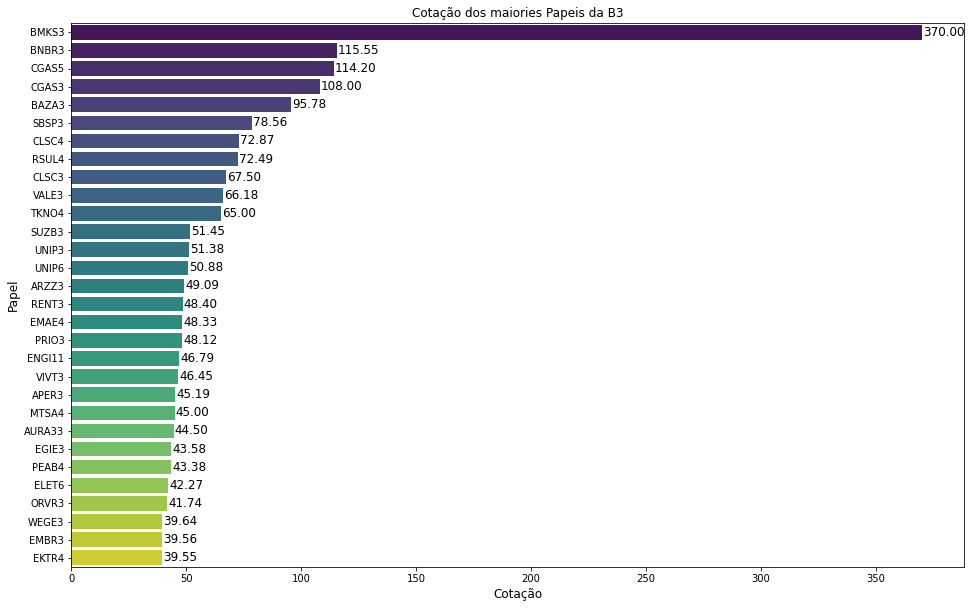

In [25]:
# Gráfico de barras dos 30 papeis com as maiores cotações

fig1, ax1 = plt.subplots(figsize=(16, 10))
sns.barplot(data=df_maiores_cot, y="Papel", x='Cotação', palette="viridis", ax=ax1)
ax1.set_title('Cotação dos maiories Papeis da B3')
plt.ylabel('Papel', fontsize=12)
plt.xlabel('Cotação', fontsize=12)

# Adicionando valores nas barras
for bar in ax1.patches:
    width = bar.get_width()  # Pegando o tamanho da barra
    y = bar.get_y() + bar.get_height() / 2  # Pegando a posição y da barra
    ax1.text(
        width + 0.5,  # Ajustando o x ao lado da barra
        y,  # Centralizando o o texto
        f'{width:.2f}',  # Formandando o número para 2 decimais
        color='black',
        ha='left',  # alinhando ao fim da barra
        va='center',  # Centralizando verticalmenet
        fontsize=12
    )

plt.show()

In [26]:
df_menores_cot = b3_data_df[b3_data_df['Data últ cot'] == '2024-05-17'].sort_values('Cotação', ascending=True)[:30]

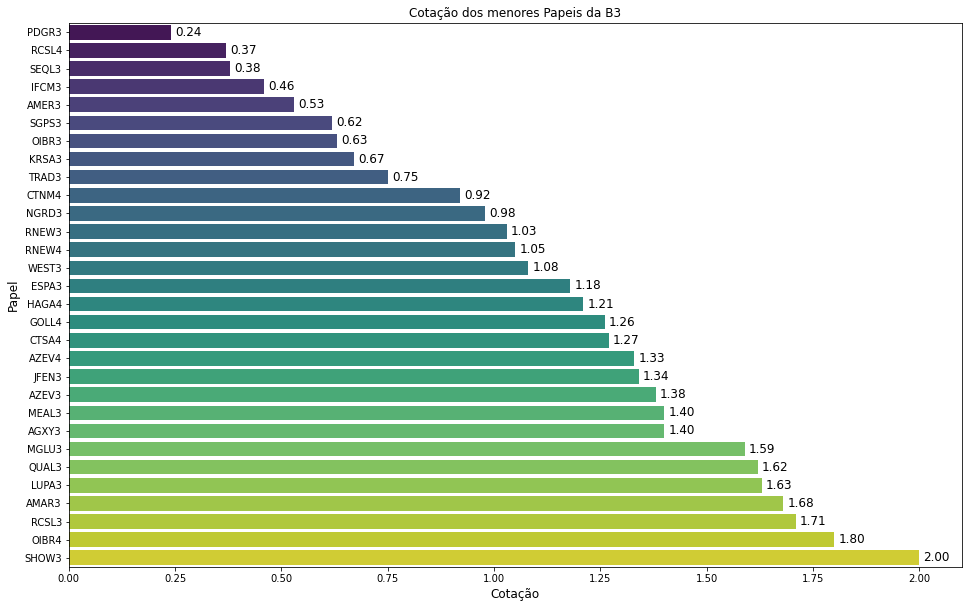

In [27]:
# Gráfico de barras dos 30 papeis com as menores cotações

fig1, ax1 = plt.subplots(figsize=(16, 10))
sns.barplot(data=df_menores_cot, y="Papel", x='Cotação', palette="viridis", ax=ax1)
ax1.set_title('Cotação dos menores Papeis da B3')
plt.ylabel('Papel', fontsize=12)
plt.xlabel('Cotação', fontsize=12)

# Adicionando valores nas barras
for bar in ax1.patches:
    width = bar.get_width()  # Pegando o tamanho da barra
    y = bar.get_y() + bar.get_height() / 2  # Pegando a posição y da barra
    ax1.text(
        width + 0.01,  # Ajustando o x ao lado da barra
        y,  # Centralizando o o texto
        f'{width:.2f}',  # Formandando o número para 2 decimais
        color='black',
        ha='left',  # alinhando ao fim da barra
        va='center',  # Centralizando verticalmenet
        fontsize=12
    )

plt.show()

In [28]:
# Criando um Dataframe com cotações médias

cot_mean = b3_data_df.Cotação.mean()
b3_cotmean_df = b3_data_df[(b3_data_df['Cotação'] < (cot_mean + 20)) & (b3_data_df['Cotação'] > (cot_mean - 20))]           # Definindo um range médio de cotação
b3_cotmean_df = b3_cotmean_df[b3_cotmean_df['Data últ cot'] == '2024-05-17'].sort_values('Cotação', ascending=False)[:30]

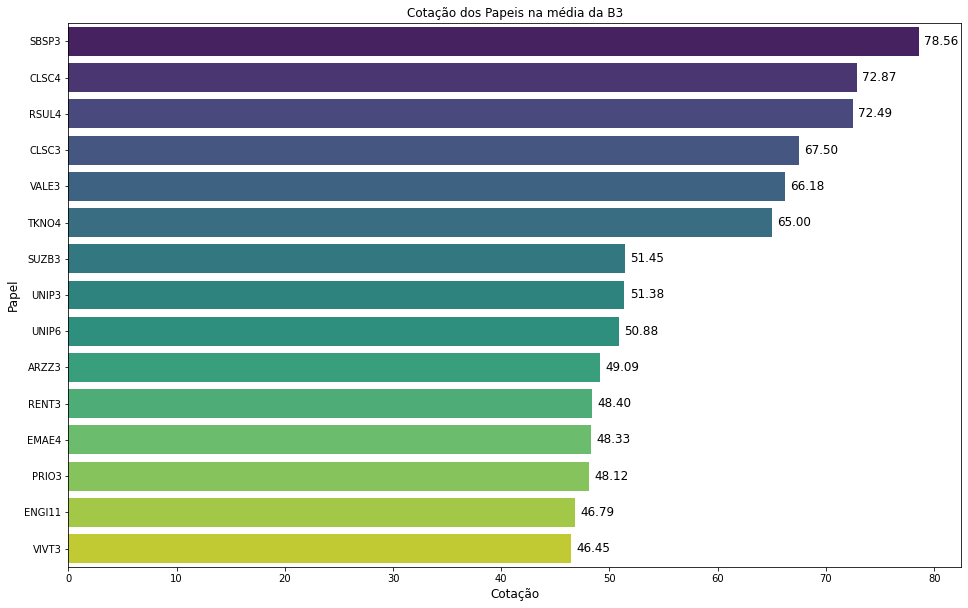

In [29]:
# Gráfico de barras dos 30 papeis em média de cotações +-20 Reais em ordem decrescente

fig1, ax1 = plt.subplots(figsize=(16, 10))
sns.barplot(data=b3_cotmean_df, y="Papel", x='Cotação', palette="viridis", ax=ax1)
ax1.set_title('Cotação dos Papeis na média da B3')
plt.ylabel('Papel', fontsize=12)
plt.xlabel('Cotação', fontsize=12)

# Adicionando valores nas barras
for bar in ax1.patches:
    width = bar.get_width()  # Pegando o tamanho da barra
    y = bar.get_y() + bar.get_height() / 2  # Pegando a posição y da barra
    ax1.text(
        width + 0.5,  # Ajustando o x ao lado da barra
        y,  # Centralizando o o texto
        f'{width:.2f}',  # Formandando o número para 2 decimais
        color='black',
        ha='left',  # alinhando ao fim da barra
        va='center',  # Centralizando verticalmenet
        fontsize=12
    )

plt.show()

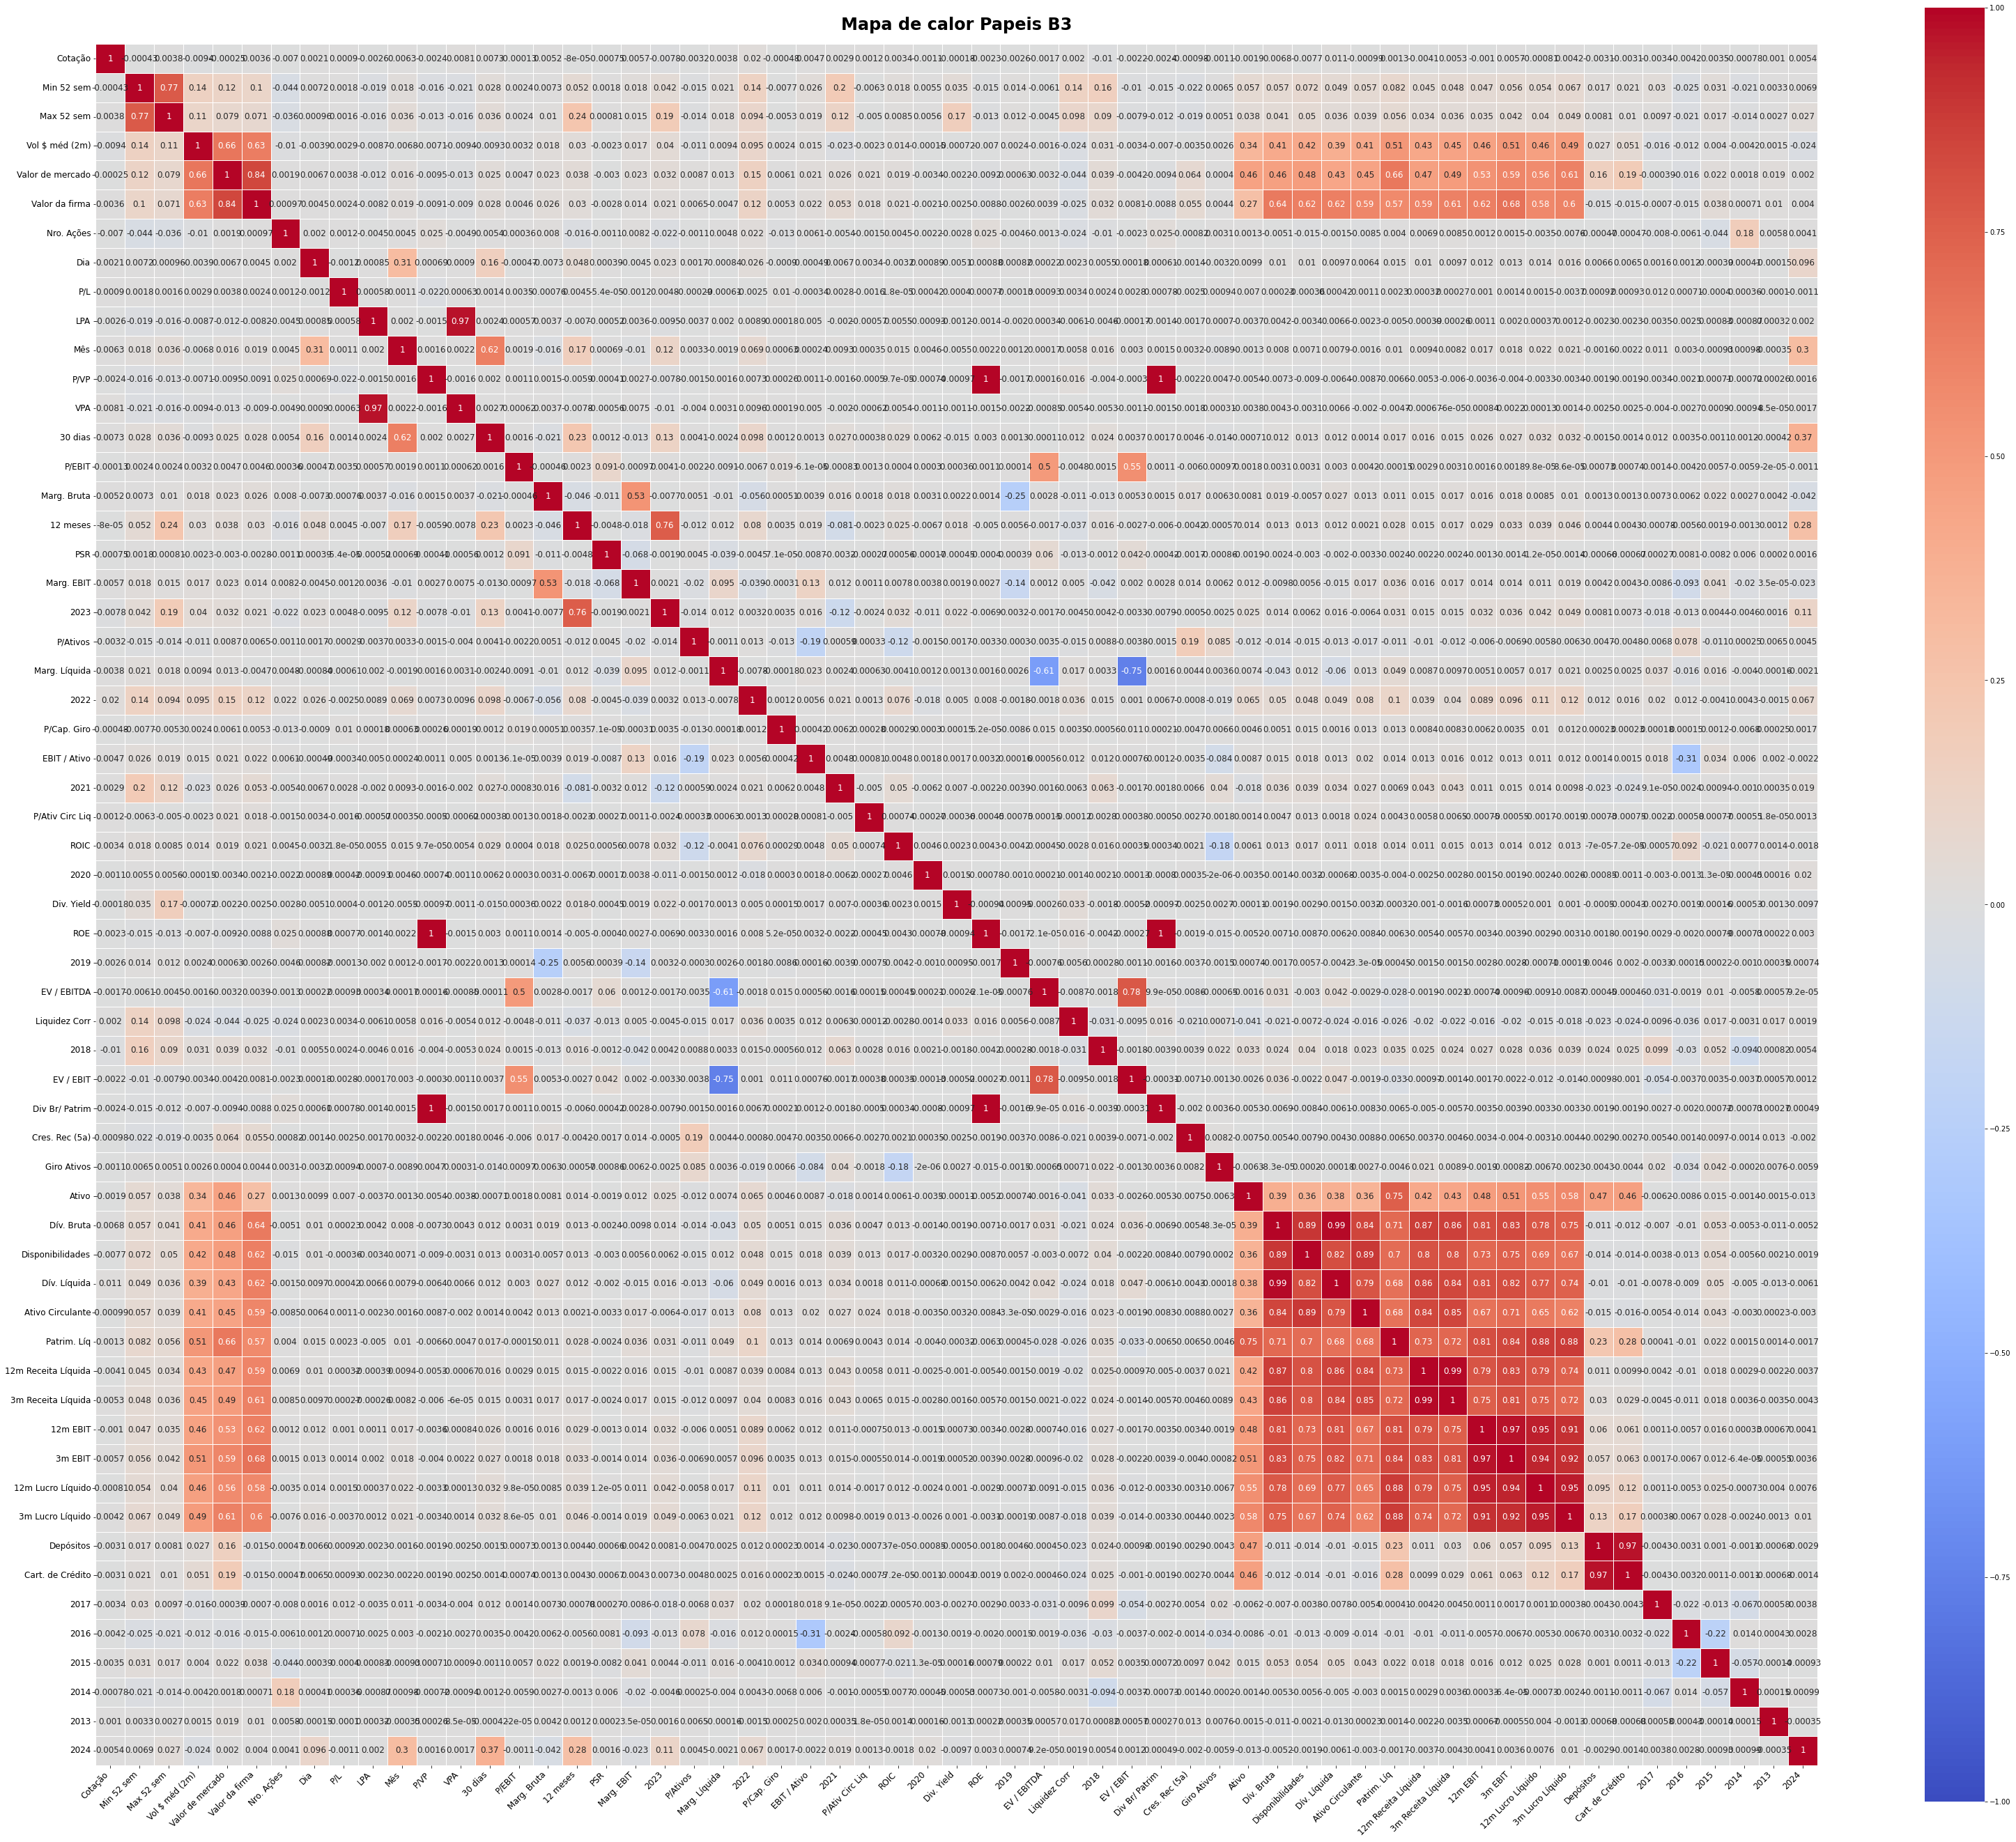

In [30]:

# Mapa de correlação dados B3

plt.figure(figsize=(45, 45))  # Adjust to optimal size

sns.heatmap(
    b3_data_df.corr(),
    vmin=-1,
    vmax=1,
    annot=True,         # Show correlation values
    annot_kws={"size": 12},  # Adjust font size for annotations
    cmap='coolwarm',     # Use a divergent colormap for better contrast
    linewidths=0.5,      # Add space between cells
    linecolor='white',   # Separate cells with white lines
    square=True,         # Make cells square for a cleaner layout
    cbar_kws={'shrink': 0.8, 'aspect': 30}  # Adjust color bar size
)

# Add a descriptive title
plt.title(
    'Mapa de calor Papeis B3',
    fontsize=24,
    fontweight='bold',
    pad=20
)

# Adjust tick labels for readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to avoid overlapping elements
plt.tight_layout()

plt.show()

O Mapa de calor não demonstra uma clareza nas variáveis que apontam o valor de um papel.

In [31]:
df_b3_last = b3_data_df[b3_data_df['Data últ cot'] == '2024-05-17']

In [32]:
# Extraindo ano, mês e dia da coluna Data últ cot

b3_data_df['Ano'] = b3_data_df['Data últ cot'].dt.year
b3_data_df['Mes'] = b3_data_df['Data últ cot'].dt.month
b3_data_df['Dia'] = b3_data_df['Data últ cot'].dt.day

In [33]:
# Copiando dados em um df novo para manipulação

b3_data_cp = b3_data_df.copy()
b3_data_cp.drop(['Data últ cot', 'data_cap', 'Últ balanço processado'], axis=1, inplace=True) # deletando colunas tipo data

In [34]:
# Codificando colunas categóricas

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Definindo transformer para codificar apenas colunas Object
transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), b3_data_cp.select_dtypes(include=['object']).columns)],
    remainder='passthrough'  # Não alterar outras colunas
)

In [35]:
# Select only object columns and exclude datetime columns
categorical_cols = b3_data_df.select_dtypes(include=['object']).columns
non_datetime_cols = [col for col in categorical_cols if not pd.api.types.is_datetime64_any_dtype(b3_data_df[col])]

In [36]:
# Aplicar transformer ao dataFrame
df_transformed = transformer.fit_transform(b3_data_cp)

# Converter o resultado de volta ao dataframe caso necessário
df_encoded = pd.DataFrame(df_transformed.toarray(), columns=transformer.get_feature_names_out())

In [37]:
df_encoded.shape

(80981, 2111)

In [38]:
b3_data_cp.shape

(80981, 66)

In [39]:
b3_data_cp = b3_data_cp.join(df_encoded)

In [40]:
droped_columns = b3_data_cp.select_dtypes(include=['object']).columns

In [41]:
b3_data_cp.drop(droped_columns, axis=1, inplace=True)

In [42]:
b3_data_cp.head()

,Cotação,Min 52 sem,Max 52 sem,Vol $ méd (2m),Valor de mercado,Valor da firma,Nro. Ações,Dia,P/L,LPA,...,remainder__Depósitos,remainder__Cart. de Crédito,remainder__2017,remainder__2016,remainder__2015,remainder__2014,remainder__2013,remainder__2024,remainder__Ano,remainder__Mes
0,12.17,12.17,24.30,9578510,1439630000,2335250000,118293000,18,-5.02,-2.42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,8.0
1,18.27,15.28,21.26,16134400,4130670000,0,226090000,18,5.12,3.57,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,8.0
2,14.36,12.86,16.03,334377000,226225000000,217787000000,15753800000,18,15.84,0.91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023.0,8.0
3,4.91,0.00,0.00,0,515088000,868691000,104906000,11,-214.80,-0.02,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010.0,2.0
4,95.27,0.00,0.00,0,7080470000,6437160000,74320000,18,8.79,10.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008.0,4.0


In [43]:
from sklearn.utils import shuffle

# Emabralhando dataset

df_b3_data_shuffled = shuffle(b3_data_cp, random_state=42)

In [44]:
df_stock_value = df_b3_data_shuffled['Cotação']
df_b3_data_shuffled.drop('Cotação', axis=1, inplace=True)
df_stock_value.head()

7298     32.62
46369    17.57
1696      5.70
38864    50.01
26978     5.79
Name: Cotação, dtype: float64

In [45]:
# Separando bases de teste e treino

from sklearn.model_selection import train_test_split

X = df_b3_data_shuffled  # Entrada
y = df_stock_value    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    )         

In [46]:
# Normalizando dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
X_train.shape

(64784, 2171)

In [48]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [49]:
X_train.shape

(64784, 2171, 1)

## Testando Modelos Deeplearning

In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# Define the regression model
def build_regression_model(input_dim):
    model = models.Sequential([
        layers.InputLayer(input_shape=(input_dim,)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Single output for regression
    ])
    return model

# Get input dimension (number of features)
input_dim = X_train.shape[1]

# Build the model
model = build_regression_model(input_dim)

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error',  # Regression loss
    metrics=['mean_absolute_error']  # Track MAE
)

model.summary()

2024-12-28 14:31:33.107517: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-12-28 14:31:33.107545: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-28 14:31:33.107549: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-28 14:31:33.107612: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-28 14:31:33.107647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                139008    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 141121 (551.25 KB)
Trainable params: 141121 (551.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 10% of the training data for validation
    epochs=10,             # Adjust epochs as needed
    batch_size=32,         # Adjust batch size as needed
    verbose=1              # Show training progress
)

Epoch 1/10


2024-12-28 14:31:40.523845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 14:31:40.544944: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 14:31:40.553862: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


1620/1620 [==============================] - ETA: 0s - loss: 667651.1875 - mean_absolute_error: 50.5001

2024-12-28 14:31:51.404286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 14:31:51.411548: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 14:31:51.415134: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


1620/1620 [==============================] - 12s 6ms/step - loss: 667651.1875 - mean_absolute_error: 50.5001 - val_loss: 14826.0098 - val_mean_absolute_error: 23.4844
Epoch 2/10
1620/1620 [==============================] - 9s 6ms/step - loss: 489211.2188 - mean_absolute_error: 30.3101 - val_loss: 1784.9462 - val_mean_absolute_error: 15.7260
Epoch 3/10
1620/1620 [==============================] - 10s 6ms/step - loss: 434880.6562 - mean_absolute_error: 28.0934 - val_loss: 3428.7957 - val_mean_absolute_error: 17.3880
Epoch 4/10
1620/1620 [==============================] - 10s 6ms/step - loss: 419243.1250 - mean_absolute_error: 25.7185 - val_loss: 16257.3594 - val_mean_absolute_error: 21.2375
Epoch 5/10
1620/1620 [==============================] - 10s 6ms/step - loss: 384707.2812 - mean_absolute_error: 23.3587 - val_loss: 37051.6562 - val_mean_absolute_error: 25.8570
Epoch 6/10
1620/1620 [==============================] - 11s 7ms/step - loss: 350102.8125 - mean_absolute_error: 26.6376 - va

In [52]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

  9/507 [..............................] - ETA: 3s - loss: 24376.5000 - mean_absolute_error: 25.3590

2024-12-28 14:33:26.224528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 14:33:26.248412: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 14:33:26.259391: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto


507/507 [==============================] - 3s 6ms/step - loss: 472204.0000 - mean_absolute_error: 24.6480
Test Loss: 472204.0000, Test MAE: 24.6480


In [53]:
# Extract loss and validation loss from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract MAE and validation MAE if available
train_mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']

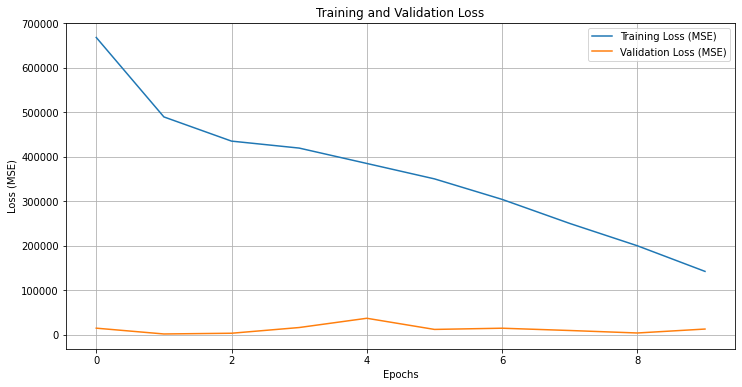

In [54]:
# Plot Loss (MSE) over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss (MSE)')
plt.plot(val_loss, label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


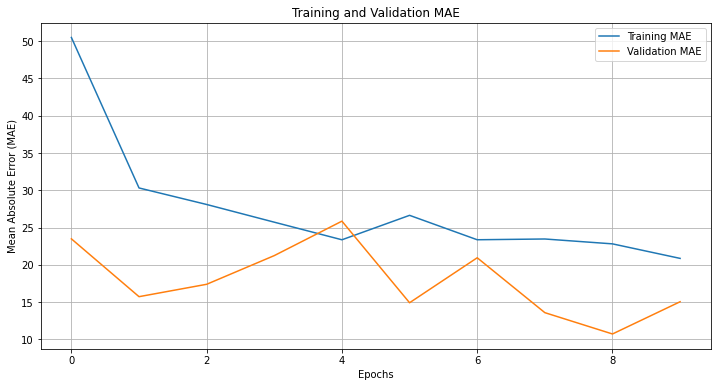

In [55]:
# Plot MAE over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

Tentando Modelo alternativo

In [56]:
# Define the model
model = models.Sequential()

# Add a 1D Convolutional Layer
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(2171, 1)))

# Add a MaxPooling Layer
model.add(layers.MaxPooling1D(pool_size=2))

# Add another Convolutional Layer
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))

# Add another MaxPooling Layer
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output for the Dense layer
model.add(layers.Flatten())

# Add a Dense layer
model.add(layers.Dense(128, activation='relu'))

# Add the output layer for regression
model.add(layers.Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2169, 64)          256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 1084, 64)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 1082, 128)         24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 541, 128)          0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 69248)             0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [58]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=32)

Epoch 1/10
1418/1418 [==============================] - 32s 22ms/step - loss: 3958396.2500 - mae: 301.6526 - val_loss: 219662.5781 - val_mae: 192.8639
Epoch 2/10
1418/1418 [==============================] - 31s 22ms/step - loss: 64409108.0000 - mae: 769.9126 - val_loss: 108714483712.0000 - val_mae: 306519.3750
Epoch 3/10
1418/1418 [==============================] - 31s 22ms/step - loss: 17982353758486528.0000 - mae: 9120799.0000 - val_loss: 363964991012864.0000 - val_mae: 11436591.0000
Epoch 4/10
1418/1418 [==============================] - 30s 21ms/step - loss: 108041882042368.0000 - mae: 1987481.8750 - val_loss: 1231086198542303232.0000 - val_mae: 682845120.0000
Epoch 5/10
1418/1418 [==============================] - 31s 22ms/step - loss: 1520332537446597009680105472.0000 - mae: 12849637228544.0000 - val_loss: 7698953590768926720.0000 - val_mae: 2750049536.0000
Epoch 6/10
1418/1418 [==============================] - 31s 22ms/step - loss: 19087926924696039847123484672.0000 - mae: 5968

In [66]:
# Extract loss and validation loss from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract MAE and validation MAE if available
train_mae = history.history['mae']
val_mae = history.history['val_mae']

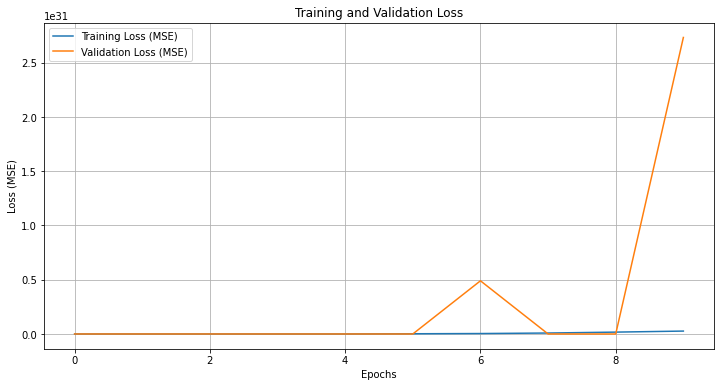

In [67]:
# Plot Loss (MSE) over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss (MSE)')
plt.plot(val_loss, label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

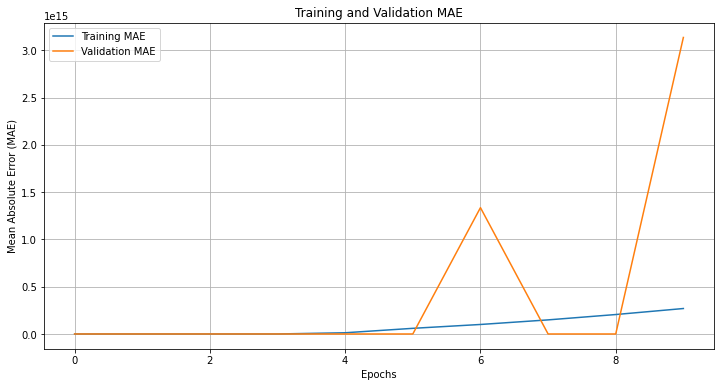

In [68]:
# Plot MAE over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

Testando modelo alternativo

In [69]:
# Definindo modelo

model = models.Sequential()
model.add(layers.LSTM(64, activation='tanh', input_shape=(2171, 1), return_sequences=True))
model.add(layers.LSTM(32, activation='tanh'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2171, 64)          16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_5 (Dense)             (None, 128)               4224      
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33665 (131.50 KB)
Trainable params: 33665 (131.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
# Treinando modelo

# Train the model
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=32)

Epoch 1/10


2024-12-28 14:59:03.683510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 14:59:03.784717: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 14:59:03.903417: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 14:59:03.982554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 14:59:03.990820: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 14:59:03.995185: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorfl

1418/1418 [==============================] - ETA: 0s - loss: 714157.5000 - mae: 85.9042

2024-12-28 15:04:25.041071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 15:04:25.074579: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 15:04:25.102701: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 15:04:25.129835: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 15:04:25.135600: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 15:04:25.138414: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorfl

1418/1418 [==============================] - 362s 253ms/step - loss: 714157.5000 - mae: 85.9042 - val_loss: 738224.1875 - val_mae: 82.1194
Epoch 2/10
1418/1418 [==============================] - 357s 252ms/step - loss: 713817.1250 - mae: 88.7658 - val_loss: 738295.1250 - val_mae: 68.9231
Epoch 3/10
1418/1418 [==============================] - 357s 251ms/step - loss: 709687.6250 - mae: 85.1793 - val_loss: 732356.6250 - val_mae: 85.0397
Epoch 4/10
1418/1418 [==============================] - 357s 251ms/step - loss: 707393.3125 - mae: 86.8974 - val_loss: 730169.2500 - val_mae: 81.1952
Epoch 5/10
1418/1418 [==============================] - 356s 251ms/step - loss: 705656.6875 - mae: 88.0675 - val_loss: 728297.2500 - val_mae: 86.5368
Epoch 6/10
1418/1418 [==============================] - 356s 251ms/step - loss: 703445.0000 - mae: 88.0667 - val_loss: 726557.5625 - val_mae: 91.5754
Epoch 7/10
1418/1418 [==============================] - 356s 251ms/step - loss: 699476.7500 - mae: 89.7546 - va

In [71]:
# Extract loss and validation loss from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract MAE and validation MAE if available
train_mae = history.history['mae']
val_mae = history.history['val_mae']

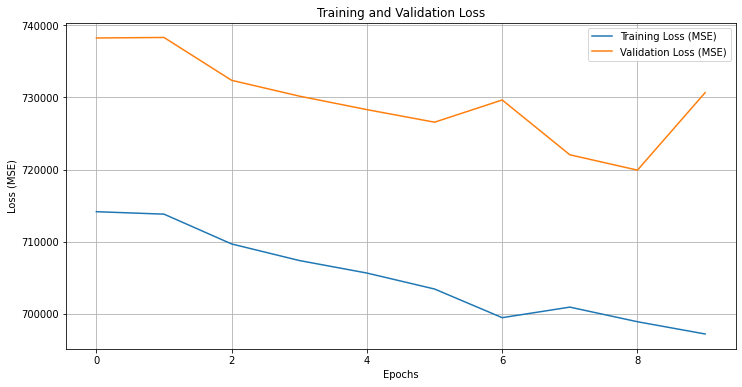

In [72]:
# Plot Loss (MSE) over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss (MSE)')
plt.plot(val_loss, label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

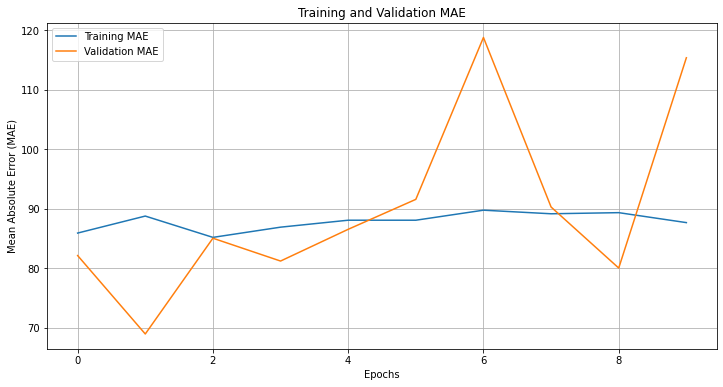

In [73]:
# Plot MAE over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
# Define the model
model = models.Sequential()

# Convolutional layers for feature extraction
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(2171, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# LSTM layer for sequential data modeling
model.add(layers.LSTM(64, activation='tanh', return_sequences=False))

# Dense layers for regression
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 2169, 64)          256       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 1084, 64)          0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 1082, 128)         24704     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 541, 128)          0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense_7 (Dense)             (None, 128)              

In [75]:
# Treinando modelo

history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=32)

Epoch 1/10


2024-12-28 16:41:10.729708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 16:41:10.797794: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 16:41:10.845934: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 16:41:10.923675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 16:41:10.932713: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 16:41:10.937124: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorfl

1418/1418 [==============================] - ETA: 0s - loss: 712736.6250 - mae: 80.3580

2024-12-28 16:42:33.550432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 16:42:33.574891: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 16:42:33.594116: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 16:42:33.634594: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-12-28 16:42:33.640401: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorflow.GraphDef proto
2024-12-28 16:42:33.643204: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Unparseable tensorfl

1418/1418 [==============================] - 94s 66ms/step - loss: 712736.6250 - mae: 80.3580 - val_loss: 733812.0000 - val_mae: 74.6786
Epoch 2/10
1418/1418 [==============================] - 92s 65ms/step - loss: 697336.0000 - mae: 76.4658 - val_loss: 700468.0625 - val_mae: 70.4661
Epoch 3/10
1418/1418 [==============================] - 93s 65ms/step - loss: 649714.3125 - mae: 71.5194 - val_loss: 642449.2500 - val_mae: 71.9524
Epoch 4/10
1418/1418 [==============================] - 94s 67ms/step - loss: 589138.5000 - mae: 65.1868 - val_loss: 736571.9375 - val_mae: 61.2656
Epoch 5/10
1418/1418 [==============================] - 95s 67ms/step - loss: 645345.6875 - mae: 72.8084 - val_loss: 562870.1250 - val_mae: 55.9465
Epoch 6/10
1418/1418 [==============================] - 94s 67ms/step - loss: 516027.5312 - mae: 47.8118 - val_loss: 607759.6250 - val_mae: 80.3788
Epoch 7/10
1418/1418 [==============================] - 94s 67ms/step - loss: 539955.2500 - mae: 52.2424 - val_loss: 531990

In [76]:
# Extract loss and validation loss from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Extract MAE and validation MAE if available
train_mae = history.history['mae']
val_mae = history.history['val_mae']

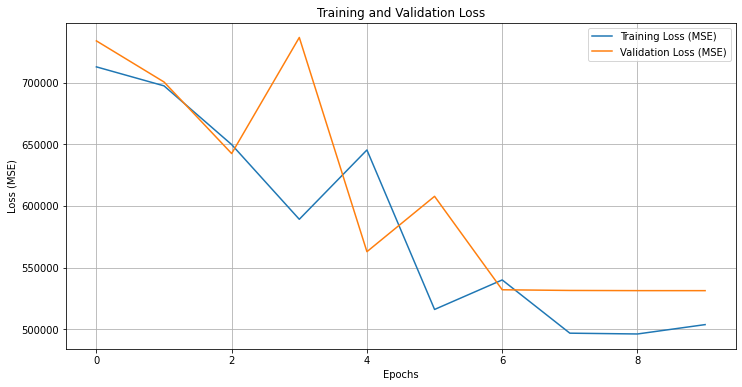

In [77]:
# Plot Loss (MSE) over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_loss, label='Training Loss (MSE)')
plt.plot(val_loss, label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

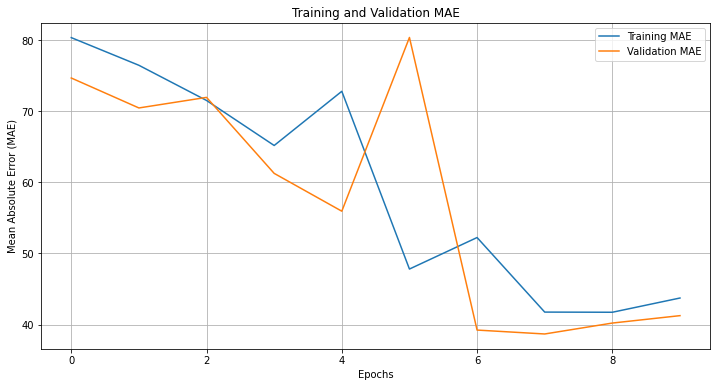

In [78]:
# Plot MAE over epochs
plt.figure(figsize=(12, 6))
plt.plot(train_mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid(True)
plt.show()